https://www.kaggle.com/sasha18/recommend-books-using-count-tfidf-on-titles?

# What is Recommendation System ?
Recommender/recommendation system is a subclass of information filtering system that seeks to predict the rating/ preference a user would give to an item.

They are primarily used in applications where a person/ entity is involved with a product/ service. To further improve their experience with this product, we try to personalize it to their needs. For this we have to look up at their past interactions with this product.

In one line -> **Specialized content for everyone.**

For further info, [Wiki](https://en.wikipedia.org/wiki/Recommender_system#:~:text=A%20recommender%20system%2C%20or%20a,would%20give%20to%20an%20item.)

**Types of Recommender System**
* 1). Popularity Based
* 2). Classification Based
* 3). Content Based
* 4). Collaborative Based
* 5). Hybrid Based (Content + Collaborative)
* 6). Association Based Rule Mining

# Content based recommender system

Recommends content based on product description. Here we would recommend books based on book titles only. Similar books would have similar names thus having a high cosine similarity. 

This code is a short version of [Content Based Movie Recommendation using NLP](https://www.kaggle.com/sasha18/content-based-movie-recommendation-using-nlp) as the Movie dataset had many features like movie description, director, actor that would help to better recommend a movie. 

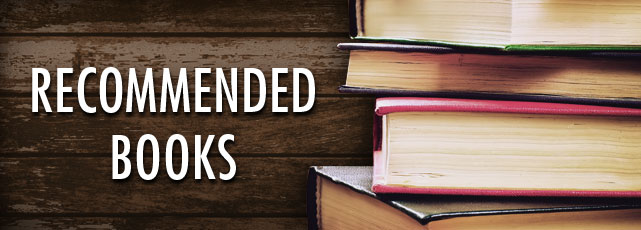

**Here is to recommend a good book**

# Import packages and dataset

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

data = pd.read_csv('./goodbooks-10k/books.csv')
data.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [2]:
data.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

In [3]:
data.isnull().sum()

id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

# Data Preprocessing

**Things to do:**

* Extract only relevant columns (the ones having text we need)
* Check if there are null values in extracted columns

In [4]:
from joblib import Parallel, delayed

In [5]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

In [6]:
original_title = Pipeline([
                ('selector', ColumnSelector(key='original_title'))
            ])

book_id =  Pipeline([
                ('selector', NumberSelector(key='book_id'))
            ])

feats = FeatureUnion([('book_id', book_id),
                      ('original_title', original_title)])

feature_processing = Pipeline([('feats', feats)])
feature_processing.fit_transform(data)

array([[2767052, 'The Hunger Games'],
       [3, "Harry Potter and the Philosopher's Stone"],
       [41865, 'Twilight'],
       ...,
       [77431, 'The Mauritius Command'],
       [8565083,
        'Cinderella Ate My Daughter: Dispatches from the Frontlines of the New Girlie-Girl Culture'],
       [8914, 'The First World War']], dtype=object)

In [7]:
feats.get_params().keys()

dict_keys(['n_jobs', 'transformer_list', 'transformer_weights', 'verbose', 'book_id', 'original_title', 'book_id__memory', 'book_id__steps', 'book_id__verbose', 'book_id__selector', 'book_id__selector__key', 'original_title__memory', 'original_title__steps', 'original_title__verbose', 'original_title__selector', 'original_title__selector__key'])

In [8]:
#Extract relevant columns that would influence a book's rating based on book title. 
books_title = data[['book_id', 'title']]
books_title.head()

,book_id,title
0,2767052,"The Hunger Games (The Hunger Games, #1)"
1,3,Harry Potter and the Sorcerer's Stone (Harry P...
2,41865,"Twilight (Twilight, #1)"
3,2657,To Kill a Mockingbird
4,4671,The Great Gatsby


## For content based book recommendation we have to use NLP techniques like

* Keyword extraction -> Extract keywords from title
* Cosine Similarity -> Find cosine similarity between all movie titles

# Keyword Extraction
Keyword extraction is automatic detection of terms that best describe the subject of a document. 

*For more info -> [Wiki](https://en.wikipedia.org/wiki/Keyword_extraction) & [Keyword Extraction](https://monkeylearn.com/keyword-extraction/)*

**For keyword extraction we use one of the below based on our need,**

* **CountVectorizer** - Provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.


* **Tf-Idf Vectorizer** - Tf-Idf finds the no. of times a word occurs in a document and then compares this count to the no. of times the word shows up in a bunch of other documents in a collection. It then generates a rank for each word where it is important to a document if it shows up a lot in that particular document but doesn’t show up a lot in all the other documents.


* **Rake** - Rake is used when you want to extract keywords without any specific context *(though it does use a generalized set of stopwords)*

*Wonderful articles -> [Comparison of Rake & Tf-Idf algorithms](https://nzmattgrant.wordpress.com/2018/01/31/a-comparison-of-rake-and-tf-idf-algorithms-for-finding-keywords-in-text/) & [CountVectorizer vs Tf-Idf Vectorizer](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)* 

We will use CountVectorizer as we want to extract keywords just from book titles.

# Count Vectorizer
Convert a collection of text documents to a matrix of token counts. It's a data table that is obtained after normalization of next-generation sequencing data.

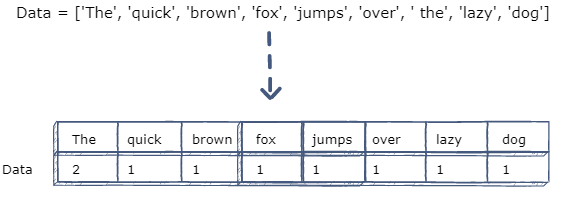

*For more info -> [Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)*

**Things to do:**

* Initialize & Fit CountVectorizer into 'title' -> to create count_matrix this is useful for cosine similarity
* Check all words/ features in the vocabulary
* Generate cosine similarity

In [9]:
"""
#Lets vectorize all these titles
from sklearn.feature_extraction.text import CountVectorizer

#initialize vectorizer
vect = CountVectorizer(analyzer = 'word', ngram_range = (1,2), stop_words = 'english', min_df = 0.002) #min_df = rare words, max_df = most used words
#ngram_range = (1,2) - if used more than  1(value), lots of features or noise

#Fit into the title
vect.fit(books_title['title'])
title_matrix = vect.transform(books_title['title'])
title_matrix.shape
"""

"\n#Lets vectorize all these titles\nfrom sklearn.feature_extraction.text import CountVectorizer\n\n#initialize vectorizer\nvect = CountVectorizer(analyzer = 'word', ngram_range = (1,2), stop_words = 'english', min_df = 0.002) #min_df = rare words, max_df = most used words\n#ngram_range = (1,2) - if used more than  1(value), lots of features or noise\n\n#Fit into the title\nvect.fit(books_title['title'])\ntitle_matrix = vect.transform(books_title['title'])\ntitle_matrix.shape\n"

The total no. of features we could extract are 261 due to min_df threshold we applied.


**What happens when we change the value of min_df value? What is this argument controlling?**

When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

If we repeat the above steps from while changing the min_df to 0.001, the threshold level is reduced and further more words will be added to features i.e 704 words instead of 261 earlier


In [10]:
"""
#Lets find vocabulary/features
features = vect.get_feature_names()
features
"""

'\n#Lets find vocabulary/features\nfeatures = vect.get_feature_names()\nfeatures\n'

# Cosine Similarity between Titles

**Things to do:**
* Initialize Cosine similarity into title matrix
* Extract features from book title
* Using Cosine similarity between this title and all other titles to be recommended the top 10 books 

In [11]:
"""
cosine_sim_titles = cosine_similarity(title_matrix, title_matrix)
cosine_sim_titles.shape
"""

'\ncosine_sim_titles = cosine_similarity(title_matrix, title_matrix)\ncosine_sim_titles.shape\n'

In [12]:
"""
#Get books which are similar to a given title
title_id = 100
books_title['title'].iloc[title_id]
"""

"\n#Get books which are similar to a given title\ntitle_id = 100\nbooks_title['title'].iloc[title_id]\n"

In [13]:
"""
#Find out what features have been considered  by the vectorizer for a given title ?
feature_array = np.squeeze(title_matrix[title_id].toarray()) #squeeze activity matrix into array
idx = np.where(feature_array > 0)
idx[0]
[features[x] for x in idx[0]]
"""

'\n#Find out what features have been considered  by the vectorizer for a given title ?\nfeature_array = np.squeeze(title_matrix[title_id].toarray()) #squeeze activity matrix into array\nidx = np.where(feature_array > 0)\nidx[0]\n[features[x] for x in idx[0]]\n'

In [14]:
"""
# Find index of feature
idx[0]
"""

'\n# Find index of feature\nidx[0]\n'

In [15]:
"""
#Cosine similarity with other similar titles
n = 15 #how many books to be recommended
top_n_idx = np.flip(np.argsort(cosine_sim_titles[title_id,]), axis = 0)[0:n]
top_n_sim_values = cosine_sim_titles[title_id, top_n_idx]
top_n_sim_values
"""

'\n#Cosine similarity with other similar titles\nn = 15 #how many books to be recommended\ntop_n_idx = np.flip(np.argsort(cosine_sim_titles[title_id,]), axis = 0)[0:n]\ntop_n_sim_values = cosine_sim_titles[title_id, top_n_idx]\ntop_n_sim_values\n'

In [16]:
"""
#find top n with values > 0
top_n_idx = top_n_idx[top_n_sim_values > 0]
#Matching books
books_title['title'].iloc[top_n_idx]
"""

"\n#find top n with values > 0\ntop_n_idx = top_n_idx[top_n_sim_values > 0]\n#Matching books\nbooks_title['title'].iloc[top_n_idx]\n"

In [17]:
# lets wrap the above code in a function

"""
def return_sim_books(title_id, title_matrix, vectorizer, top_n = 10):
    
    # generate sim matrix
    sim_matrix = cosine_similarity(title_matrix, title_matrix)
    features = vectorizer.get_feature_names()

    top_n_idx = np.flip(np.argsort(sim_matrix[title_id,]),axis=0)[0:top_n]
    top_n_sim_values = sim_matrix[title_id, top_n_idx]
    
    # find top n with values > 0
    top_n_idx = top_n_idx[top_n_sim_values > 0]
    scores = top_n_sim_values[top_n_sim_values > 0]
    
    
    # find features from the vectorized matrix
    sim_books_idx = books_title['title'].iloc[top_n_idx].index
    words = []
    for book_idx in sim_books_idx:
        try:
            feature_array = np.squeeze(title_matrix[book_idx,].toarray())
        except:
            feature_array = np.squeeze(title_matrix[book_idx,])
        idx = np.where(feature_array > 0)
        words.append([" , ".join([features[i] for i in idx[0]])])
        
    # collate results
    res = pd.DataFrame({"book_title" : books_title['title'].iloc[title_id],
           "sim_books": books_title['title'].iloc[top_n_idx].values,"words":words,
           "scores":scores}, columns = ["book_title","sim_books","scores","words"])
    
    
    return res
"""

'\ndef return_sim_books(title_id, title_matrix, vectorizer, top_n = 10):\n    \n    # generate sim matrix\n    sim_matrix = cosine_similarity(title_matrix, title_matrix)\n    features = vectorizer.get_feature_names()\n\n    top_n_idx = np.flip(np.argsort(sim_matrix[title_id,]),axis=0)[0:top_n]\n    top_n_sim_values = sim_matrix[title_id, top_n_idx]\n    \n    # find top n with values > 0\n    top_n_idx = top_n_idx[top_n_sim_values > 0]\n    scores = top_n_sim_values[top_n_sim_values > 0]\n    \n    \n    # find features from the vectorized matrix\n    sim_books_idx = books_title[\'title\'].iloc[top_n_idx].index\n    words = []\n    for book_idx in sim_books_idx:\n        try:\n            feature_array = np.squeeze(title_matrix[book_idx,].toarray())\n        except:\n            feature_array = np.squeeze(title_matrix[book_idx,])\n        idx = np.where(feature_array > 0)\n        words.append([" , ".join([features[i] for i in idx[0]])])\n        \n    # collate results\n    res = pd.D

In [18]:
"""
vect = CountVectorizer(analyzer='word',ngram_range=(1,2),stop_words='english', min_df = 0.001)
vect.fit(books_title['title'])
title_matrix = vect.transform(books_title['title'])
print(books_title['title'][10])
return_sim_books(10,title_matrix,vect,top_n=10)
"""

"\nvect = CountVectorizer(analyzer='word',ngram_range=(1,2),stop_words='english', min_df = 0.001)\nvect.fit(books_title['title'])\ntitle_matrix = vect.transform(books_title['title'])\nprint(books_title['title'][10])\nreturn_sim_books(10,title_matrix,vect,top_n=10)\n"

**Using CountVectorizer we could extract text from book titles and recommend similar titles. A limitation I came across was for titles like "The Kite Runner" & "The Dinner". It was unable to recommend similar books because of the rare words like kite and dinner in the dataset so we have to look at other better ways for recommendations.**

*Further steps, I will use Tf-Idf and Rake to see which of these give us better results.*

# Using Tf-Idf Vectorizer

Here we consider overall document weightage of a word, useful while dealing with most frequent words

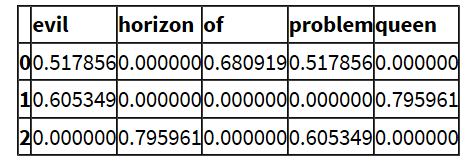

**Things to do:**
* Initialize Tfidf vectorizer & fit into title column
* Calculate cosine similarity 
* Convert all titles into a Series associated with book index numbers
* Function that gets book recommendations based on the cosine similarity score of book titles


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

tf = TfidfVectorizer(analyzer = 'word', ngram_range = (1,2), min_df = 0, stop_words = 'english')
tfidf_matrix = tf.fit_transform(books_title['title'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [20]:
titles = books_title['title']
indices = pd.Series(books_title.index, index = books_title['title']) #converting all titles into a Series

#Function that gets book recommendations based on the cosine similarity score of book titles
def book_recommendations(title, n):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key = lambda x:x[1], reverse = True)
    sim_scores = sim_scores[1:n+1]
    book_indices = [i[0] for i in sim_scores]
    return titles.iloc[book_indices]

In [21]:
#Recommend n books for a book having index 1
book_index = 10
n = 20

print(books_title['title'][book_index])
book_recommendations(books_title.title[book_index],n)

The Kite Runner


8946                                        Once a Runner
90                      The Maze Runner (Maze Runner, #1)
375                      The Death Cure (Maze Runner, #3)
945                    The Kill Order (Maze Runner, #0.5)
258                   The Scorch Trials (Maze Runner, #2)
6711    Ultramarathon Man: Confessions of an All-Night...
0                 The Hunger Games (The Hunger Games, #1)
1       Harry Potter and the Sorcerer's Stone (Harry P...
2                                 Twilight (Twilight, #1)
3                                   To Kill a Mockingbird
4                                        The Great Gatsby
5                                  The Fault in Our Stars
6                                              The Hobbit
7                                  The Catcher in the Rye
8                   Angels & Demons  (Robert Langdon, #1)
9                                     Pride and Prejudice
11                              Divergent (Divergent, #1)
12            

# Recommend similar books based on a list of books read

Input list of books

In [22]:
book_recommendations('A Tale of Two Cities',3)

5871    A Tale of Two Cities / Great Expectations
2697                             Invisible Cities
1699                    A Tale for the Time Being
Name: title, dtype: object

In [23]:
my_list = [x for x in data['original_title'].tail(3)]
my_list = pd.DataFrame(my_list, columns =['Books read'])
my_list

,Books read
0,The Mauritius Command
1,Cinderella Ate My Daughter: Dispatches from th...
2,The First World War


In [24]:
result = pd.DataFrame()
n = 3 #Recommend top n similar books
print('Recommended books: ')
for i in my_list['Books read']:
    output = pd.DataFrame(book_recommendations(i,n))
    result = result.append(output)
result = result.drop_duplicates()
result

Recommended books: 


,title
2976,The Last Command
7944,"Ender's Game, Volume 2: Command School"
9796,"Command Authority (Jack Ryan Universe, #16)"
8995,Dispatches
9799,Cinderella
5797,Not Without My Daughter
6563,War
238,World War Z: An Oral History of the Zombie War
982,Between the World and Me


*Special credits to -> Bhushan's [kernel](https://www.kaggle.com/bshirude2/goodreads-content-based-book-recommendation) it uses Tfidf vectorizer for book recommendation* 

# Summary & Model deployment

As we infer, Tfidf vectorizer gives better results, I tried extracting keywords using Rake but it did not give right outputs. I'll add in Rake later. 

Things to keep in mind while pushing this code for production,

* How would you provide the training inputs *(read book index number/ title)* as the dataset needs to be regularly updated with latest books
* How would you input a user's list of books he read
* User's list of books may not be in the same format/ title as your input data. You will have to look for ways like converting everything to .lower() or convert the books_read csv into a format that matches input data.

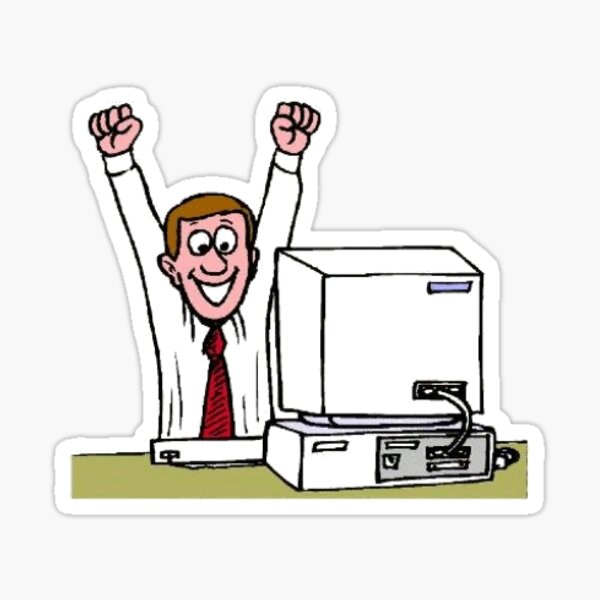